<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1cQUYXOx74c0bi7viel6O4_DfXdg4k-96" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Detección de pose usando YOLO v8

Basado en: https://docs.ultralytics.com/tasks/segment/#models


In [ ]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.2 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))

Saving wheelchair-person.jpg to wheelchair-person.jpg


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-pose.pt')  # load an official model

# Predict with the model
results = model([filename for filename in uploaded])


0: 640x448 2 persons, 110.6ms
Speed: 2.7ms preprocess, 110.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


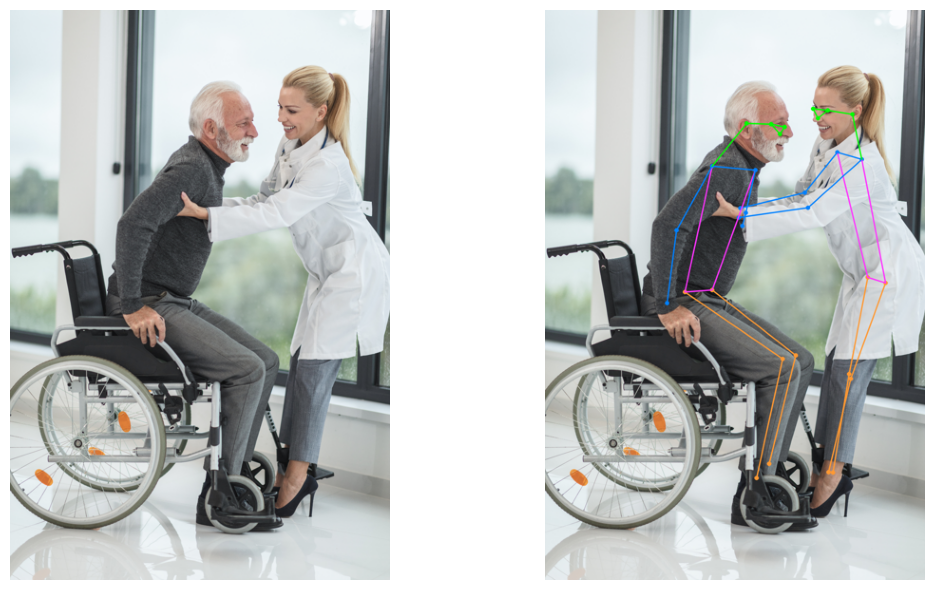

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

for r in results:
    img_array = r.plot(conf=False, labels=False, boxes=False)
    img = Image.fromarray(img_array[..., ::-1])  # RGB PIL image
    org = Image.fromarray(r.orig_img[:, :, ::-1])

    desired_width = 400
    width_percent = (desired_width / float(im.size[0]))
    desired_height = int((float(im.size[1]) * float(width_percent)))

    img = img.resize((desired_width, desired_height))
    org = org.resize((desired_width, desired_height))

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas, puedes ajustar el tamaño con figsize
    ax[0].imshow(org)
    ax[0].axis('off')
    ax[1].imshow(img)
    ax[1].axis('off')
    plt.tight_layout()
    plt.show()

